In [ ]:
pip install pandas numpy scikit-learn matplotlib

In [ ]:
#Exercise 1.1
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A    0
B    0
C    1
D    1
dtype: int64


In [ ]:
#Exercise 1.2
# Drop rows with any missing values
print(df.dropna(axis=0))

# Drop columns with any missing values
print(df.dropna(axis=1))

# Drop rows where all values are missing (none in this case)
print(df.dropna(how='all'))

# Drop rows with fewer than 4 non-missing values
print(df.dropna(thresh=4))

# Drop rows where 'C' is missing
print(df.dropna(subset=['C']))

     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN


Drop rows if:
Dataset is large, and losing a few rows won’t hurt.
Only a small fraction of rows have missing values.

Drop columns if:
A whole column has too many missing values.
That column isn’t critical for your analysis/model.

In [ ]:
#Exercise 1.3
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


Most_frequent is useful for categorical data because categorical values don’t have a meaningful mean or median. Instead, filling missing entries with the most common category (mode) preserves valid category labels and reflects the majority trend in the data.

In [ ]:
#Exercise 2.1
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
    ['Pink', 'S',8.2,'class3'],
    ['Purple', 'XS',5.3,'class3']])
df.columns = ['color', 'size', 'price', 'classlabel']

size_mapping = {'XL': 3, 'L': 2, 'M': 1, 'S': 0}
df['size'] = df['size'].map(size_mapping)
print(df)

# Inverse mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print(df['size'].map(inv_size_mapping))

    color  size  price classlabel
0   green   1.0   10.1     class2
1     red   2.0   13.5     class1
2    blue   3.0   15.3     class2
3    Pink   0.0    8.2     class3
4  Purple   NaN    5.3     class3
0      M
1      L
2     XL
3      S
4    NaN
Name: size, dtype: object


In [ ]:
#Exercise 2.2
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
print(y)

# Inverse
print(class_le.inverse_transform(y))

[1 0 1 2 2]
['class2' 'class1' 'class2' 'class3' 'class3']


Label encoding ensures: Compatibility across all ML libraries.
Faster computation (integers are lightweight).
A consistent mapping between class names and numerical targets.

In [ ]:
#Exercise 2.3
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
print(ohe.fit_transform(X[:, [0]]).toarray())  # Only on 'color'

# Using pandas get_dummies
print(pd.get_dummies(df[['price', 'color', 'size']]))

# Drop first column to avoid multicollinearity
print(pd.get_dummies(df[['price', 'color', 'size']], drop_first=True))

[[3 1.0 10.1]
 [4 2.0 13.5]
 [2 3.0 15.3]
 [0 0.0 8.2]
 [1 nan 5.3]]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
   price  size  color_Pink  color_Purple  color_blue  color_green  color_red
0   10.1   1.0       False         False       False         True      False
1   13.5   2.0       False         False       False        False       True
2   15.3   3.0       False         False        True        False      False
3    8.2   0.0        True         False       False        False      False
4    5.3   NaN       False          True       False        False      False
   price  size  color_Purple  color_blue  color_green  color_red
0   10.1   1.0         False       False         True      False
1   13.5   2.0         False       False        False       True
2   15.3   3.0         False        True        False      False
3    8.2   0.0         False       False        False      False
4    5.3   NaN          True       False        False

Multicollinearity happens when one feature can be perfectly predicted from others (e.g., one-hot encoded dummies add up to 1). This redundancy can make models like linear regression unstable.

Dropping one column removes the redundancy by setting a baseline category, preventing perfect correlation while keeping all information intact.

In [ ]:
#Exercise 3.1
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print(df_wine.head())

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

Changing test_size to 0.2 gives 142 train and 36 test samples while preserving class proportions.
Stratify ensures balanced class representation in both sets, which is critical for fair model training and evaluation.

In [ ]:
#Exercise 4.1
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm[:2])

[[0.12573099 0.02964427 0.65240642 0.3814433  0.2962963  0.42068966
  0.39451477 0.16981132 0.61075949 0.11634103 0.32978723 0.66300366
  0.17261056]
 [0.79239766 0.14624506 0.51336898 0.31958763 0.30864198 0.42068966
  0.44092827 0.24528302 0.36392405 0.28952043 0.73404255 0.56776557
  0.7146933 ]]


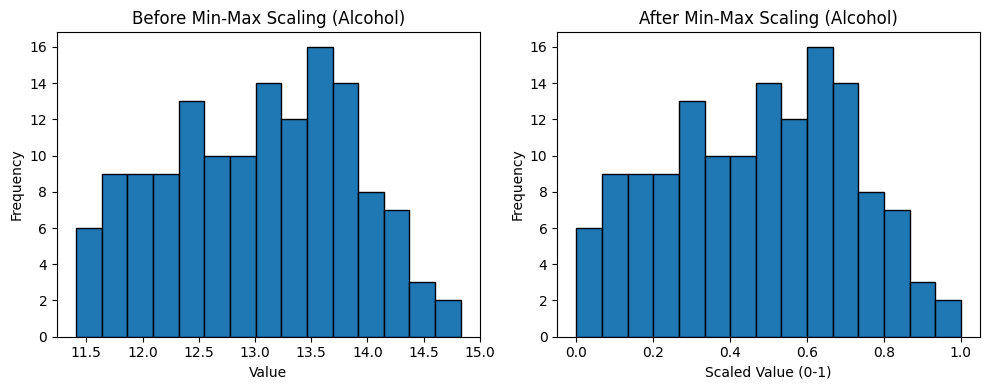

In [ ]:
import matplotlib.pyplot as plt

feature_idx = 0

original = X_train[:, feature_idx]

scaled = X_train_norm[:, feature_idx]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(original, bins=15, edgecolor='k')
plt.title("Before Min-Max Scaling (Alcohol)")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(scaled, bins=15, edgecolor='k')
plt.title("After Min-Max Scaling (Alcohol)")
plt.xlabel("Scaled Value (0-1)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
#Exercise 4.2
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std[:2])

print("Train mean:", X_train_std.mean(axis=0)[:5])
print("Train std :", X_train_std.std(axis=0)[:5])

[[-1.45083563 -1.27985582  0.74306024 -0.49136511 -0.37078043 -0.15558334
   0.17965734 -1.20822065  1.29150989 -0.84486398 -0.74910758  0.66674895
  -0.71247369]
 [ 1.34746381 -0.75756493 -0.2118226  -0.84257574 -0.29683265 -0.15558334
   0.39838279 -0.87620839 -0.0490171  -0.00656951  0.99652401  0.29506888
   1.63245344]]
Train mean: [-2.00387437e-15 -1.32914024e-16 -1.53711160e-15  1.23922781e-16
 -1.64187912e-16]
Train std : [1. 1. 1. 1. 1.]


Normalization (Min-Max scaling): compresses values to [0,1].
Standardization (Z-score scaling): rescales features to mean 0 and std 1.
Preferred when:
Features have different scales.
Data has outliers → Min-Max scaling can squash most values.
Algorithms assume normally distributed features, e.g. Logistic Regression, Linear Regression, SVM, PCA, KNN.

In [ ]:
#Exercise 5.1
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.coef_)

Training accuracy: 1.0
Test accuracy: 1.0
[[ 1.28484674  0.1735292   0.76344918 -1.26117807  0.          0.
   1.21684971  0.          0.          0.          0.          0.60399771
   2.59633153]
 [-1.53037548 -0.48561757 -1.08989502  0.58237036  0.          0.
   0.56895996  0.07296797  0.08587344 -2.12077052  1.00826237  0.
  -2.32177611]
 [ 0.16105552  0.14015842  0.543427    0.          0.          0.
  -2.43978038  0.          0.          1.8036811  -1.06497016 -0.46582891
   0.        ]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

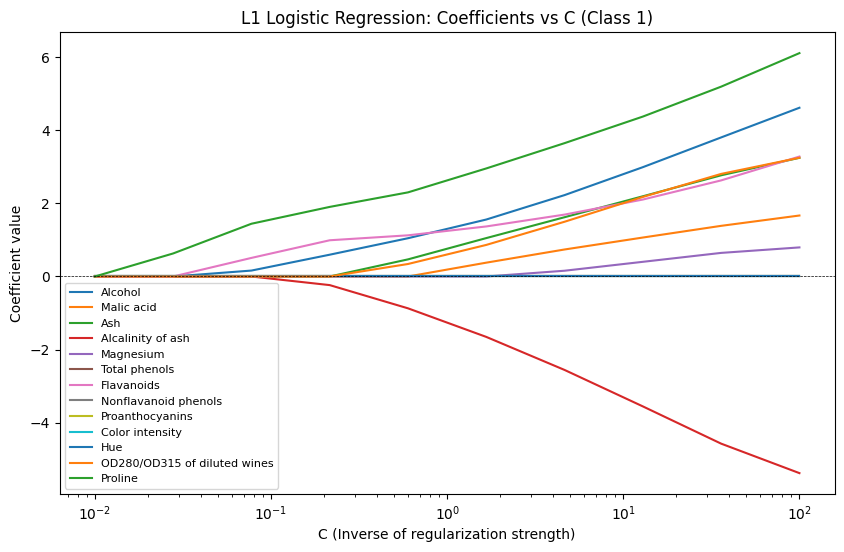

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

weights, params = [], []
Cs = np.logspace(-2, 2, 10)  # 0.01 → 100

for c in Cs:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    # Take coefficients for the first class only (shape = 13,)
    weights.append(lr.coef_[0])
    params.append(c)

weights = np.array(weights)
feature_names = df_wine.columns[1:]  # 13 features

plt.figure(figsize=(10,6))
for i in range(weights.shape[1]):
    plt.plot(params, weights[:, i], label=feature_names[i])

plt.xscale('log')
plt.xlabel('C (Inverse of regularization strength)')
plt.ylabel('Coefficient value')
plt.title('L1 Logistic Regression: Coefficients vs C (Class 1)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(loc='best', fontsize=8)
plt.show()


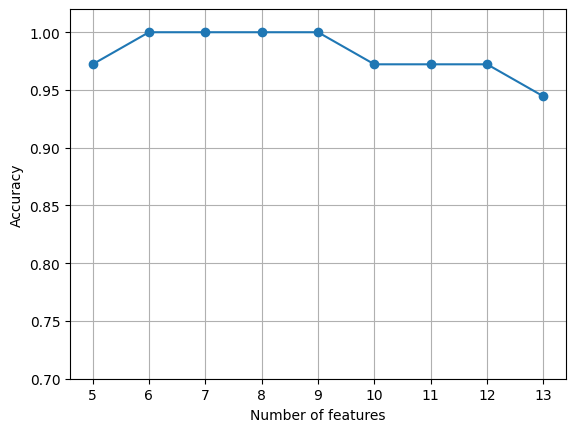

Index(['Alcohol', 'Ash', 'Alcalinity of ash', 'Flavanoids', 'Proanthocyanins'], dtype='object')
Test accuracy: 0.9722222222222222


In [30]:
#Exercise 5.2

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=5)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

# Selected features
k5 = list(sbs.subsets_[8]) # Changed index from 10 to 8
print(df_wine.columns[1:][k5])

# Performance with selected
knn.fit(X_train_std[:, k5], y_train)
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

 1) Proline                        0.188217
 2) Flavanoids                     0.151884
 3) Color intensity                0.150182
 4) Alcohol                        0.137097
 5) OD280/OD315 of diluted wines   0.126218
 6) Hue                            0.062428
 7) Total phenols                  0.051911
 8) Malic acid                     0.031839
 9) Magnesium                      0.028725
10) Alcalinity of ash              0.025410
11) Proanthocyanins                0.018676
12) Ash                            0.014667
13) Nonflavanoid phenols           0.012745


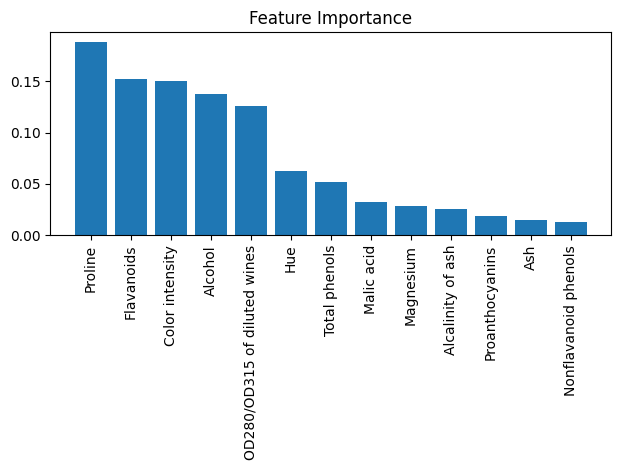

In [31]:
#Exercise 5.3
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [33]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_train_sfm = sfm.transform(X_train)
X_test_sfm = sfm.transform(X_test)

print("Original feature size:", X_train.shape[1])
print("Reduced feature size :", X_train_sfm.shape[1])

forest_sfm = RandomForestClassifier(n_estimators=500, random_state=1)
forest_sfm.fit(X_train_sfm, y_train)
print("Test accuracy (selected features):", forest_sfm.score(X_test_sfm, y_test))

# Features selected by RF (threshold=0.1)
rf_selected = feat_labels[sfm.get_support()]
print("RF selected features:", list(rf_selected))

# Features selected by SBS earlier (example k=3)
print("SBS selected features:", df_wine.columns[1:][k3])


Original feature size: 13
Reduced feature size : 5
Test accuracy (selected features): 0.9722222222222222
RF selected features: ['Alcohol', 'Flavanoids', 'Color intensity', 'OD280/OD315 of diluted wines', 'Proline']
SBS selected features: Index(['Alcohol', 'Flavanoids', 'Proanthocyanins'], dtype='object')


#Conclusion
Preprocessing is essential because raw data is rarely ready for modeling. Proper scaling, encoding, and feature selection ensure that algorithms learn from meaningful, comparable inputs. This improves accuracy, reduces overfitting, and often highlights the most informative features, leading to more reliable and interpretable models.

#Questions
1. Handling missing data prevents bias, loss of information, and model errors.

2. One-hot vs. label encoding :One-hot for categorical (no order), label encoding for ordinal (has order).

3. Feature scaling ensures fair distance/gradient calculations; crucial for KNN, SVM, logistic regression.

4. L1 vs. SBS: L1 shrinks coefficients to zero automatically; SBS removes features iteratively based on performance (slower, but model-agnostic).